In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
base_usuario = input('Digite o caminho do dataframe (CSV):')
base_usuario = base_usuario.strip('"')
base_usuario = os.path.normpath(base_usuario)

In [3]:
base = pd.read_csv(base_usuario)

In [4]:
class dataquality:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        self.linha_coluna = self.linha_e_coluna()
        self.colunas_df = self.colunas()
        self.vazios_df = self.vazios()
        self.head_resultado = self.head()
        self.tail_resultado = self.tail()
        self.sample_resultado = self.sample()
        self.quant_cat_df = self.quant_cat()
        self.col_cat_df = self.col_cat()
        self.quant_num_df = self.quant_num()
        self.col_num_df = self.col_num()
        self.num_corr_df = self.num_corr()  
    
    # Avalia quantas linhas e colunas o dataframe tem 
    def linha_e_coluna(self):
        return f'O dataframe possui {self.dataframe.shape[0]} linhas e {self.dataframe.shape[1]} colunas'
    
    # Para as colunas do dataframe
    def colunas(self):
        colunas_df = self.dataframe.columns
        return pd.DataFrame(colunas_df, columns=['Nome das Colunas'])
    
    # Mostra as primeiras linhas
    def head(self):
        return self.dataframe.head()
    
    # Mostra as últimas linhas
    def tail(self):
        return self.dataframe.tail()
    
    # Amostragem do dataframe
    def sample(self):
        return self.dataframe.sample(frac=0.1, random_state=42)
    
    # Mostra os campos vazios por coluna
    def vazios(self):
        return pd.DataFrame(self.dataframe.isna().sum(), columns=['Campos Vazios'])
    
    # Mostra a quantidade de colunas categóricas
    def quant_cat(self):
        colunas_categoricas = self.dataframe.select_dtypes(exclude=np.number)
        return f'O dataframe possui {len(colunas_categoricas.columns)} colunas categóricas'
    
    # Mostra as colunas categóricas
    def col_cat(self):
        colunas_categoricas = self.dataframe.select_dtypes(exclude=np.number).columns
        return pd.DataFrame(colunas_categoricas, columns=['Colunas Categóricas'])
    
    # Diz quantas colunas numéricas a base tem
    def quant_num(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number)
        return f'O dataframe possui {len(colunas_numericas.columns)} colunas numéricas'
    
    # Mostra as colunas numéricas
    def col_num(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number).columns
        return pd.DataFrame(colunas_numericas, columns=['Colunas Numéricas'])
    
    # correlação entre variáveis
    def num_corr(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number)
        return colunas_numericas.corr()
    
    # Heatmap das correlações
    def graf_corr(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number)
        corr = colunas_numericas.corr()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        fig.colorbar(cax)
        ticks = np.arange(len(colunas_numericas.corr()))
        ax.set_xticks(ticks)
        plt.xticks(rotation=90)
        ax.set_yticks(ticks)
        ax.set_xticklabels(colunas_numericas.columns)
        ax.set_yticklabels(colunas_numericas.columns)
        plt.title('Gráfico de correlação')
        plt.show(block=True)

    # Mostra um pairplot da correlação entre as variáveis
    def pairplot(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number)
        return sns.pairplot(colunas_numericas)
        plt.show(block=True)
    
    # Faz gráficos de uma amostragem da contagem de valores de cada coluna
    def plot_num(self):
        colunas_numericas = self.dataframe.select_dtypes(include=np.number)
        for coluna in colunas_numericas.columns:
            plt.figure(figsize=(8,4))
            sample = colunas_numericas[coluna].sample(frac=0.2, random_state=42)
            contagem = sample.value_counts().sort_index()
            plt.bar(contagem.index, contagem.values)
            plt.title(f'Sample de contagem de valores em {coluna}')
            plt.show(block=True)
    
    def __repr__(self):
        result = (
            f"{self.linha_coluna}\n\n"
            f"Colunas:\n{self.colunas_df}\n\n"
            f"Campos Vazios por Coluna:\n{self.vazios_df}\n\n"
            f"Primeiras Linhas:\n{self.head_resultado}\n\n"
            f"Últimas Linhas:\n{self.tail_resultado}\n\n"
            f"Amostra de Linhas:\n{self.sample_resultado}\n\n"
            f"{self.quant_cat_df}\n\n"
            f"Colunas Categóricas:\n{self.col_cat_df}\n\n"
            f"{self.quant_num_df}\n\n"
            f"Colunas Numéricas:\n{self.col_num_df}\n\n"
            f"Correlação entre Variáveis Numéricas:\n{self.num_corr_df}\n"
        )
        return result

O dataframe possui 10692 linhas e 13 colunas

Colunas:
       Nome das Colunas
0                  city
1                  area
2                 rooms
3              bathroom
4        parking spaces
5                 floor
6                animal
7             furniture
8              hoa (R$)
9      rent amount (R$)
10    property tax (R$)
11  fire insurance (R$)
12           total (R$)

Campos Vazios por Coluna:
                     Campos Vazios
city                             0
area                             0
rooms                            0
bathroom                         0
parking spaces                   0
floor                            0
animal                           0
furniture                        0
hoa (R$)                         0
rent amount (R$)                 0
property tax (R$)                0
fire insurance (R$)              0
total (R$)                       0

Primeiras Linhas:
           city  area  rooms  bathroom  parking spaces floor     animal  

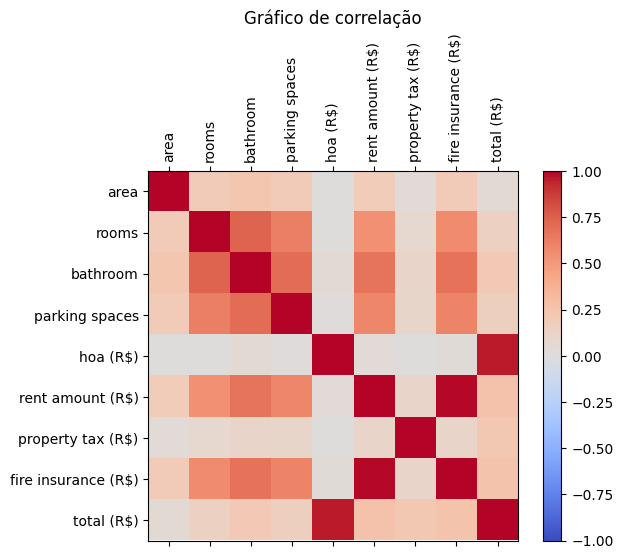

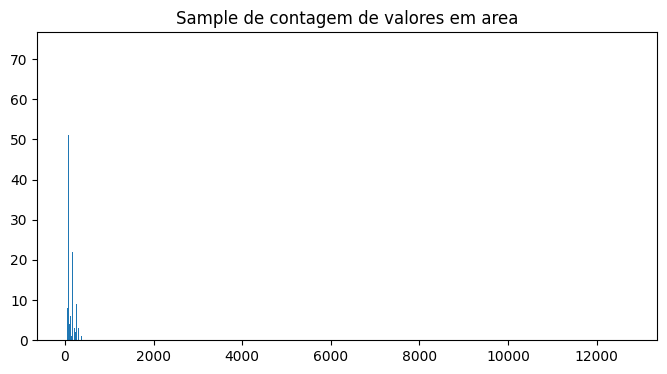

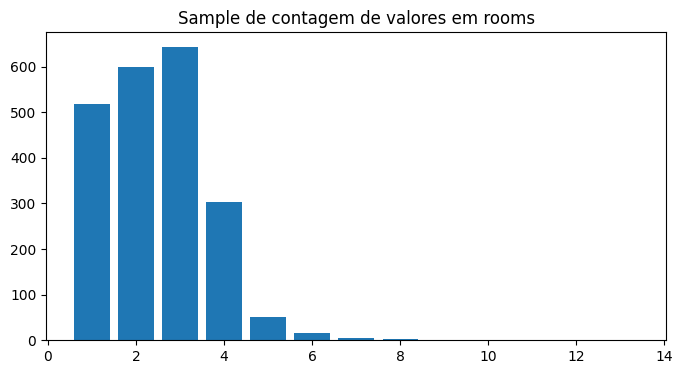

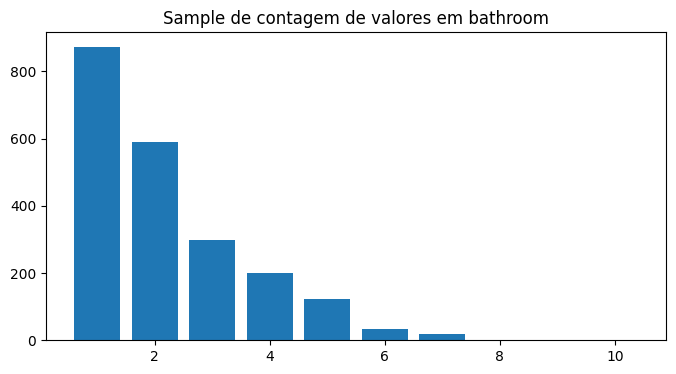

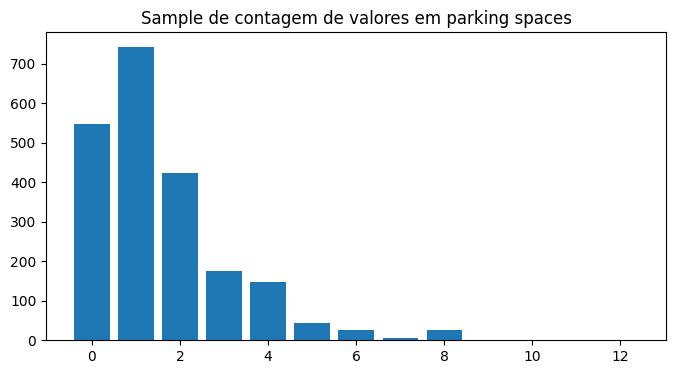

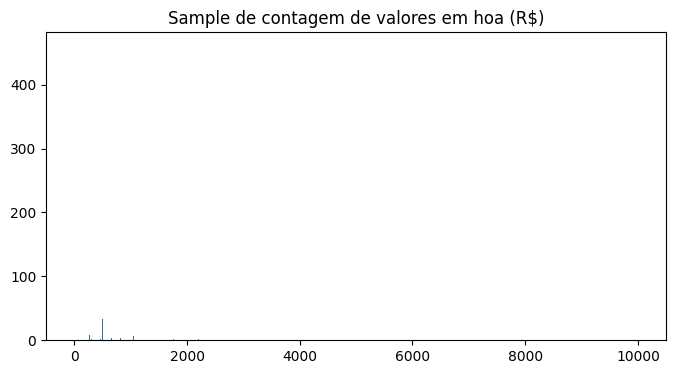

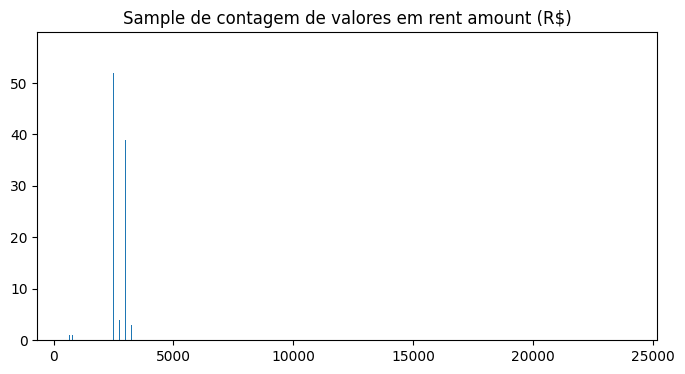

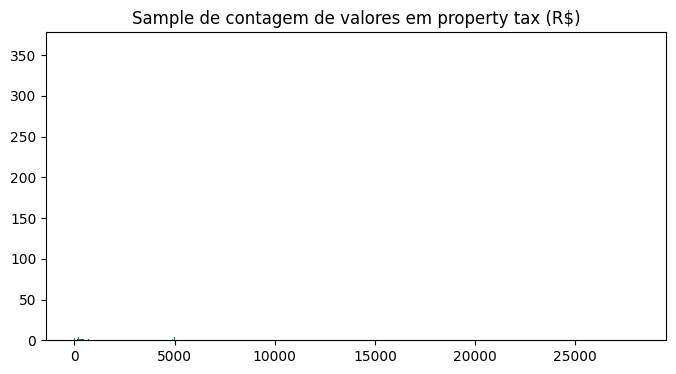

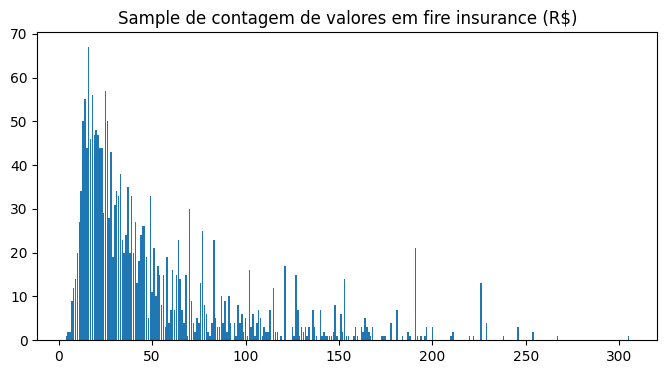

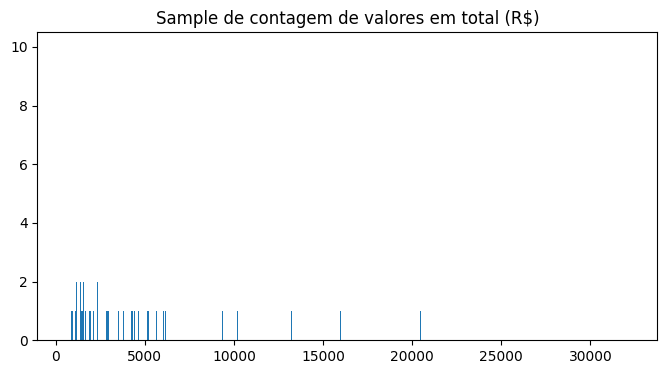

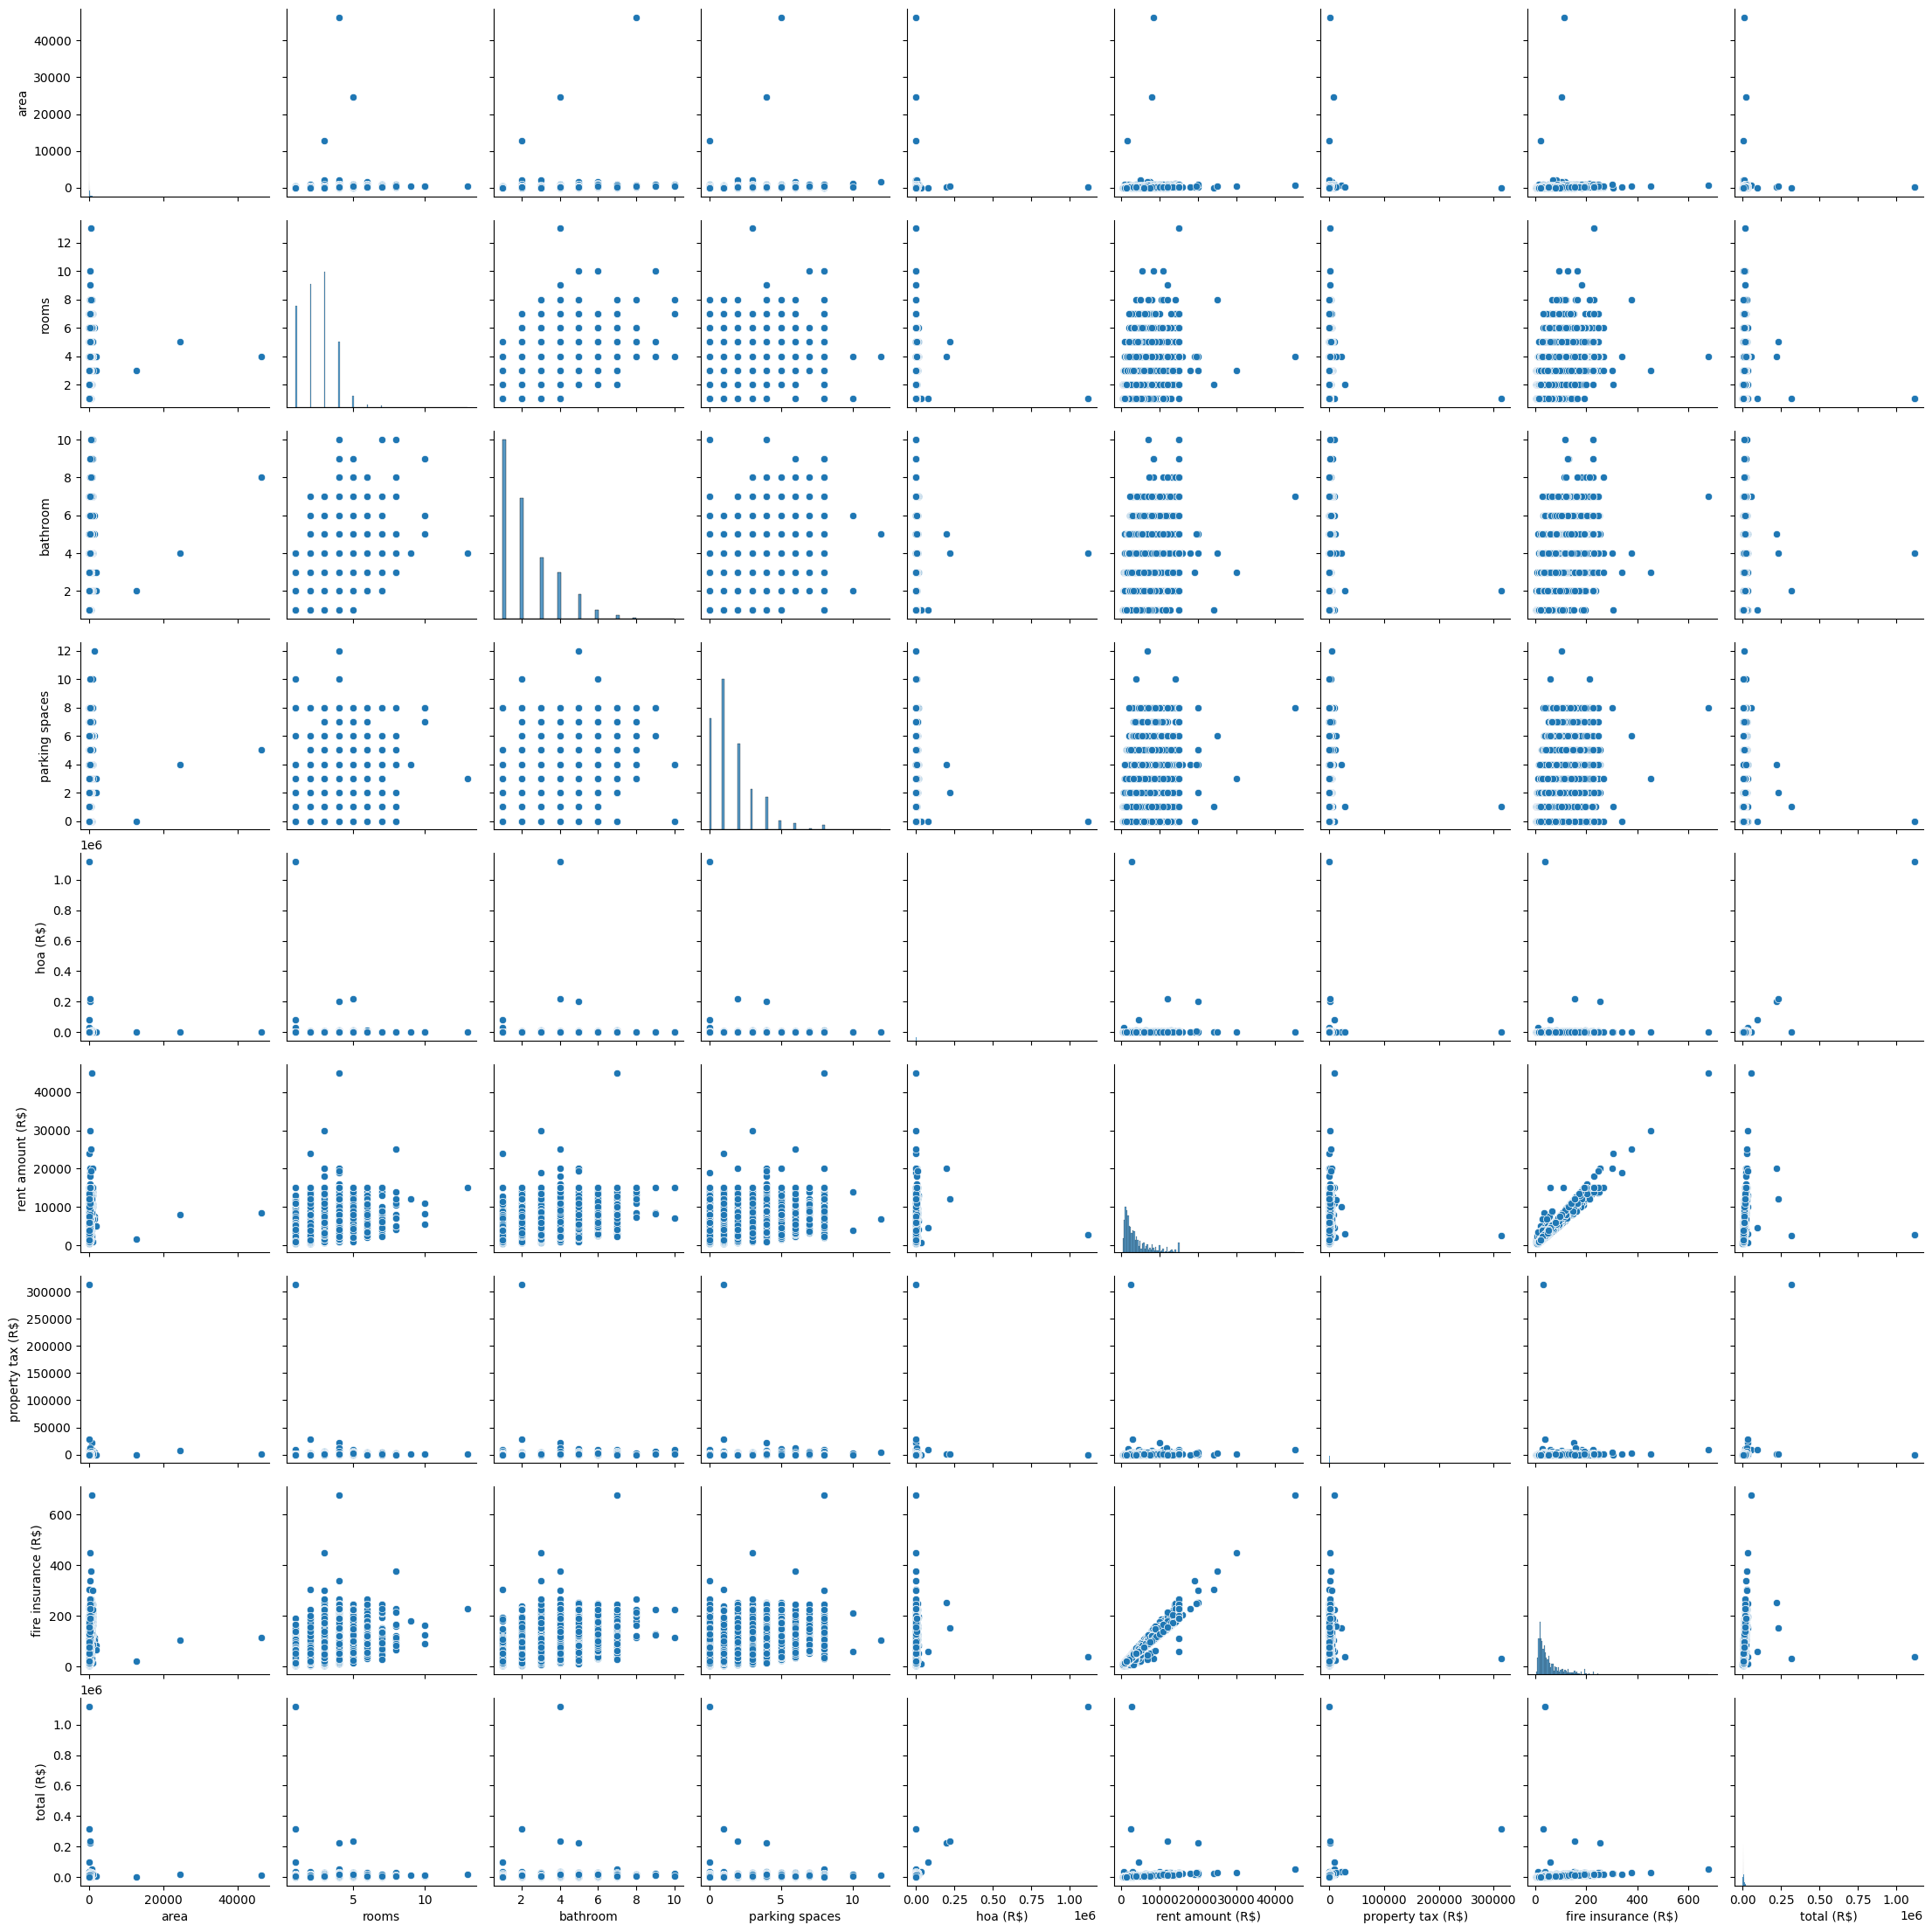

In [7]:
dataquality_test = dataquality(base)
print(dataquality_test)
dataquality_test.graf_corr()
dataquality_test.plot_num()
dataquality_test.pairplot()